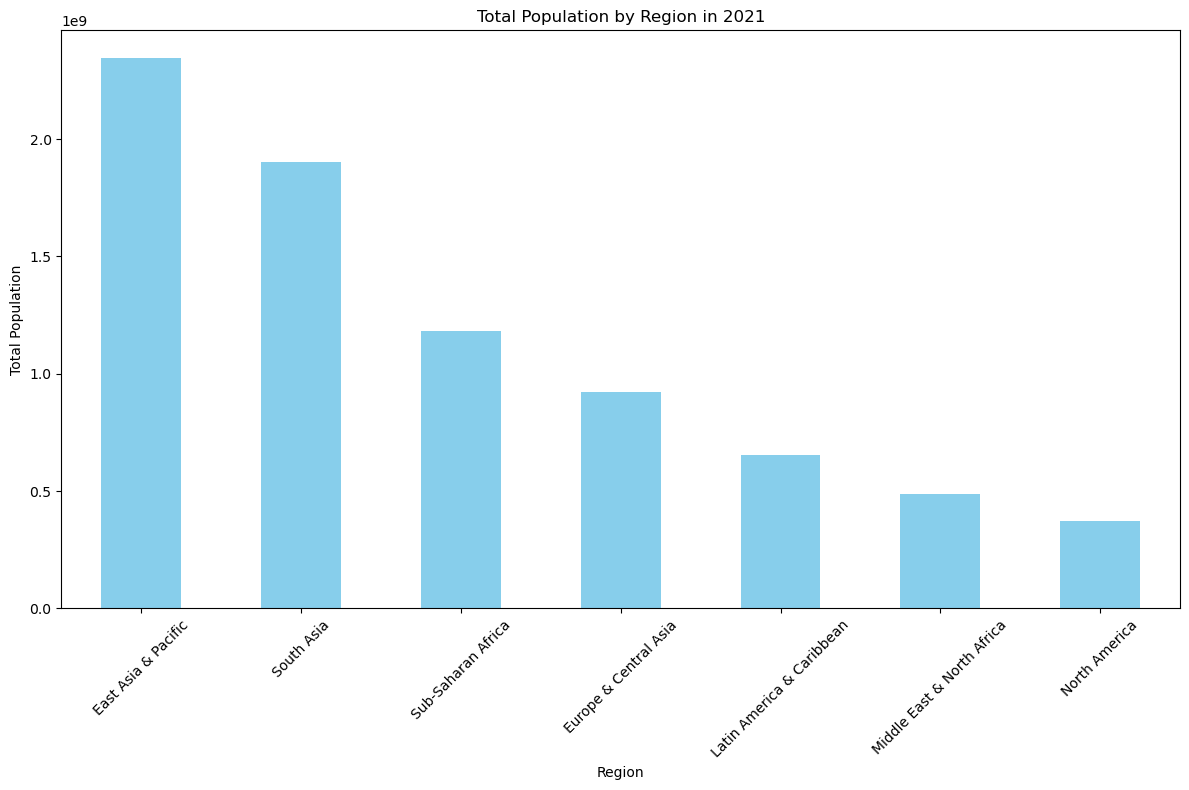

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded files
population_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_144171.csv', skiprows=4)
metadata_country = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_144171.csv')
metadata_indicator = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_144171.csv')

# Select the year for visualization
year = '2021'

# Filter the data for the selected year
population_data_year = population_data[['Country Name', 'Country Code', year]].dropna()

# Merge with country metadata to include region information
population_data_merged = pd.merge(population_data_year, metadata_country[['Country Code', 'Region']], on='Country Code', how='left')

# Aggregate the data by region
population_by_region = population_data_merged.groupby('Region')[year].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
population_by_region.plot(kind='bar', color='skyblue')
plt.title(f'Total Population by Region in {year}')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
